<a href="https://colab.research.google.com/github/InsightMart/DSPL_project/blob/main/Train_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Exploration

Train.csv

In [ ]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import preprocessing
import plotly.subplots as sp
import plotly.graph_objects as go

This code imports essential libraries for data manipulation (pandas), visualization (plotly.express, matplotlib.pyplot, seaborn, plotly.graph_objects, plotly.subplots), regular expressions (re), and machine learning preprocessing (sklearn.preprocessing).

In [ ]:
# load traincsv dataset
import pandas as pd
df = pd.read_csv("traincsv.csv")
df.head()

<ipython-input-2-b171fe9d57a1>:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("traincsv.csv")


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


This code load the traincsv.csv file into a Pandas DataFrame and displyas its first five rows.


In [ ]:
# Identify dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


This code gives summery over the dataset such as number of entires, columns, non null count and data type for each column.

In [ ]:
# List down dataset columns
list(df.columns)

['Customer_ID',
 'outlet_city',
 'luxury_sales',
 'fresh_sales',
 'dry_sales',
 'cluster_catgeory']

This code give the list of columns in the dataset.

In [ ]:
# Get dataset dimmentions
shape_before_preprocessing = df.shape
shape_before_preprocessing

(774155, 6)

The code shows the dimentions of the dataset before the prepossing.



In [ ]:
#Get summery statistics for numerics
df.describe()

,Customer_ID
count,7.741530e+05
mean,1.038708e+07
std,2.234795e+05
min,1.000000e+07
25%,1.019354e+07
50%,1.038708e+07
75%,1.058062e+07
max,1.077415e+07


Get summery statistics for values that are idetified by the python as numerics.

In [ ]:
#Getting summery statistics for objects
df.describe(include='object')

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
count,774153,774120,774114,774125.00,774154
unique,20,143897,257030,270131.00,18
top,Colombo,1029.6,6013.92,9168.72,1
freq,41031,62,28,23.00,188975


Get summery statistics for values that are idetified by the python as objects.

In [ ]:
# Get unique values in columns in a ascending order
for col in df.columns:
    unique_values = df[col].unique()
    sorted_values = sorted(unique_values, key=lambda x: str(x))  # This ensures mixed data types sort without any errors
    print(f"Unique values in {col}: {sorted_values}\n")

Get unique values in the columns in a ascending order. End of list will show any objects values in a numeric columns.

In [ ]:
# Identify number of missing values
df.isnull().sum()

,0
Customer_ID,2
outlet_city,2
luxury_sales,35
fresh_sales,41
dry_sales,30
cluster_catgeory,1


Get number of missing values in each column.

In [ ]:
# Identify number of missing values as a percentage
df.isna().sum()/len(df)*100

,0
Customer_ID,0.000258
outlet_city,0.000258
luxury_sales,0.004521
fresh_sales,0.005296
dry_sales,0.003875
cluster_catgeory,0.000129


Get percentage of missing values in each column.

In [ ]:
# Observe number of duplicated values
df.duplicated().sum()

np.int64(0)

Get the number of duplicated rows in the dataset.

In [ ]:
Numerical_columns = ('luxury_sales', 'fresh_sales', 'dry_sales')

# Generate histograms
plt.figure(figsize=(12, 6))
for col in Numerical_columns:
  col = px.histogram(df, x = col)
  col.show()

This code plot a histogram for luxury_sales, fresh_sales and dry_sales. By Looking at these histograms, each of them has a skewed distribution. Therefore when handling missing values, it is reasonable to use median imputation.

## Data Preprocessing

In [ ]:
# Removing spaces in column values
columns_to_clean = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Convert columns to string type before applying str.replace
for col in columns_to_clean:
    df[col] = df[col].astype(str)

df[columns_to_clean] = df[columns_to_clean].apply(lambda x: x.str.replace(' ', '', regex=True))

Remove unnessary spaces in the rows of luxury_sales, fresh_sales and dry_sales. This helps in replacing string values in the rows with numeric values.

In [ ]:
import re

# Extract rows where the 'luxury_sales' column contains strings
strings_in_luxury_sales = df['luxury_sales'][df['luxury_sales'].apply(lambda x: bool(re.match(r'[a-zA-Z]', str(x))))]
strings_in_luxury_sales.value_counts()

,count
luxury_sales,
nan,35
nul,3
Onethousandfourhundreadruppes,1
Eighthundreadruppess,1
sixhundreadandhirty,1
Thousandtowhundread,1
sevenhundreadandnineruppees,1
Threethousandtwohundreadruppess,1
Fourthousandonehundreadruppess,1


The code identifies all rows in the luxury_sales column that contain at least one alphabetical character, either uppercase or lowercase. It then counts how many times each unique value appears in that filtered subset.

In [ ]:
import re

# Extract rows where the 'fresh_sales' column contains strings
strings_in_luxury_sales = df['fresh_sales'][df['fresh_sales'].apply(lambda x: bool(re.match(r'[a-zA-Z]', str(x))))]
strings_in_luxury_sales.value_counts()

,count
fresh_sales,
nan,41
nul,4
Sixhundreadandfiveruppes,1
Threethousanaandfivehundread,1
thirteenthousandruppes,1
Fivethousandruppes,1
Twothousandsevenhundreadruppess,1


The code identifies all rows in the fresh_sales column that contain at least one alphabetical character, either uppercase or lowercase. It then counts how many times each unique value appears in that filtered subset.

In [ ]:
import re

# Extract rows where the 'dry_sales' column contains strings
strings_in_luxury_sales = df['dry_sales'][df['dry_sales'].apply(lambda x: bool(re.match(r'[a-zA-Z]', str(x))))]
strings_in_luxury_sales.value_counts()

,count
dry_sales,
nan,30
nul,7
Fourthousandandtwohundreadruppes,1


The code identifies all rows in the dry_sales column that contain at least one alphabetical character, either uppercase or lowercase. It then counts how many times each unique value appears in that filtered subset.

In [ ]:
# Remove string values and symbols
df.replace({'Onethousandfourhundreadruppes': 1400,
            'Eighthundreadruppess': 800,
            'sixhundreadandhirty': 630,
            'Thousandtowhundread': 2200,
            'sevenhundreadandnineruppees': 709,
            'Threethousandtwohundreadruppess': 3200,
            'Fourthousandonehundreadruppess': 4100,
            'Sixhundreadandfiveruppes': 605,
            'Threethousanaandfivehundread': 3500,
            'thirteenthousandruppes': 13000,
            'Fivethousandruppes': 5000,
            'Twothousandsevenhundreadruppess': 2700,
            'Fourthousandandtwohundreadruppes': 4200,
            '6\\': 6}, inplace=True)

The code replace all the identified string values in luxury_sales, fresh_sales and dry_sales with numerics. And remove unrelavant symbols in cluster_catgeory (Ex. 6\\\ --> 6)

In [ ]:
# Handle Missing Values

# Convert values between numeric and NaN
import numpy as np
df['luxury_sales'] = pd.to_numeric(df['luxury_sales'], errors='coerce')
df['fresh_sales'] = pd.to_numeric(df['fresh_sales'], errors='coerce')
df['dry_sales'] = pd.to_numeric(df['dry_sales'], errors='coerce')
df['cluster_catgeory'] = pd.to_numeric(df['cluster_catgeory'], errors='coerce')

# Fill missing data

# Fill missing values with median imputaion
df['luxury_sales'].fillna(df['luxury_sales'].median(), inplace=True)
df['fresh_sales'].fillna(df['fresh_sales'].median(), inplace=True)
df['dry_sales'].fillna(df['dry_sales'].median(), inplace=True)

# Fill missing values with mode imputaion
df['outlet_city'].fillna(df['outlet_city'].mode()[0], inplace=True)
df['cluster_catgeory'].fillna(df['cluster_catgeory'].mode()[0], inplace=True)

<ipython-input-18-70f02fb778f3>:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-18-70f02fb778f3>:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

- Code remove symbols within the luxury_sales, fresh_sales, dry_sales and cluster_catgeory and use imputation methods to fill in the missing values.
- Both outlet_city and cluster_catgeory are categorical variables, therefore mode imputation will be used for impute missing values.
- luxury_sales, fresh_sales and dry_sales columns should be numerical columns. There shows a skewed distribution, therefore median imputation will be used for impute missing values.


In [ ]:
# Identify number of missing values
df.isnull().sum()

,0
Customer_ID,2
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_catgeory,0


The code check number of missing values to ressure the imputation.
Since Customer_ID is a unique key in the dataset, it need not any imputation for missing values.

In [ ]:
#Change data types
df['luxury_sales'] = df['luxury_sales'].astype('float')
df['fresh_sales'] = df['fresh_sales'].astype('float')
df['dry_sales'] = df['dry_sales'].astype('float')
df['cluster_catgeory'] = df['cluster_catgeory'].astype('int')

The code will change the data types of luxury_sales, fresh_sales and dry_sales columns to float. Also cluster_catgeory to integer.

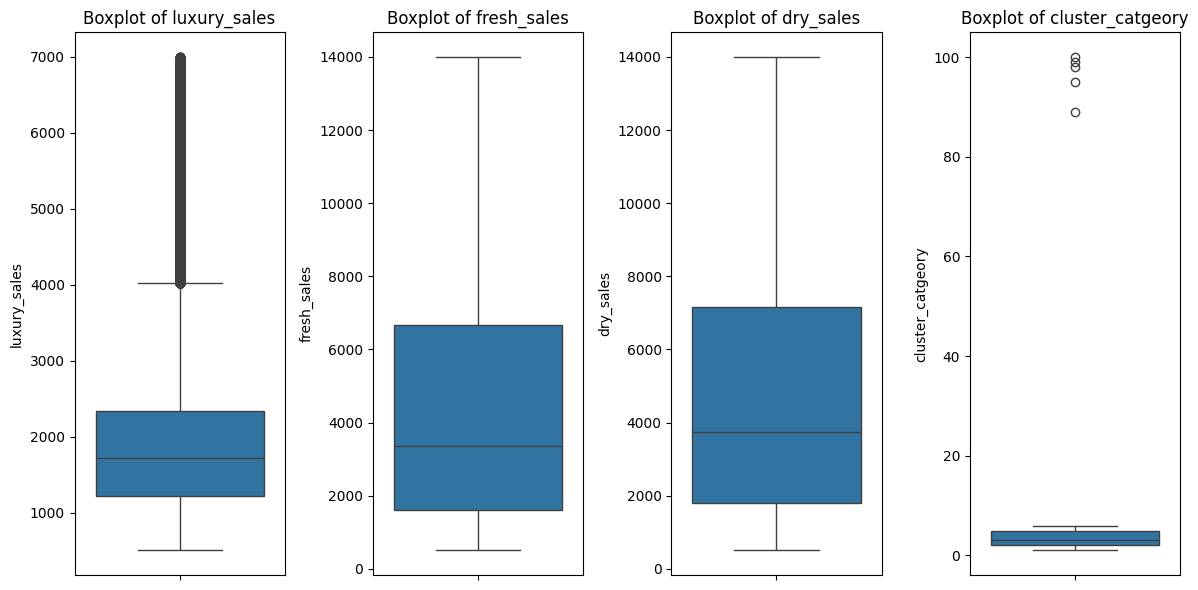

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correct the column name in the list
columns_to_check = ["luxury_sales", "fresh_sales", "dry_sales", "cluster_catgeory"]

# Set the figure size
plt.figure(figsize=(12, 6))

# Create boxplots
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(1, len(columns_to_check), i)
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

The code plot boxplot for luxury_sales, fresh_sales, dry_sales and cluster_catgeory columns to see any outlier in their values. It is evident in the plots that both luxury_sales and cluster_catgeory have outliers.

In [ ]:
# Outllier detection function
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
  return outliers

The code use IQR method into a fuction to detect outlier values that fall beyond 1.5 times the IQR from the first (Q1) and third (Q3) quartiles.

In [ ]:
# Detect outliers in luxury_sales with outllier detection function
ls_outliers = find_outliers_IQR(df['luxury_sales'])
print("number of outliers: "+ str(len(ls_outliers)))
ls_outliers

number of outliers: 35060


,luxury_sales
327511,4514.84
327515,4248.30
327521,5053.76
327522,4169.40
327525,4428.93
...,...
774148,5264.00
774151,6095.86
774152,5121.42
774153,6311.76


The code use outlier fuction to detect outliers in luxury_sales column. The output shows that ther are 35060 number of outliers.

In [ ]:
# Sort outliers in luxury_sales with ascending order
sorted_outliers = ls_outliers.sort_values()
sorted_outliers.unique()

array([4026.33, 4026.4 , 4026.56, ..., 6994.75, 6996.85, 6999.65])

The code sorts and presents the outliers detected in the luxuary_sales column in ascending order. Since luxury goods are generally more expensive than fresh goods and dry goods, there may be higher values ​​in luxury_sales. Therefore, these values ​​cannot be considered outliers.

In [ ]:
# Detect outliers in fresh_sales with outllier detection function
outliers = find_outliers_IQR(df['fresh_sales'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 0


,fresh_sales


The code use outlier fuction to detect outliers in luxury_sales column. And output shows that there is no outliers.

In [ ]:
# Detect outliers in dry_sales with outllier detection function
outliers = find_outliers_IQR(df['dry_sales'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 0


,dry_sales


The code use outlier fuction to detect outliers in dry_sales column. And output shows that there is no outliers.

In [ ]:
# Detect outliers in cluster_catgeory with outllier detection function
outliers = find_outliers_IQR(df['cluster_catgeory'])
print("number of outliers: "+ str(len(outliers)))
outliers

number of outliers: 5


,cluster_catgeory
17,99
172456,95
172689,98
555703,100
558115,89


The code use outlier fuction to detect outliers in cluster_catgeory column. The output shows there are 5 outliers. It is said in the scope of the problem, through an initial analysis, 6 customer segments of customers were identified. Therefore these outliers must be removed from the dataset.

In [ ]:
# Remove outliers
df.drop(df.index[[17,172456,172689,555703,558115]], inplace=True)

The code remove the outliers of cluster_catgeory by pointing the indexes of those 5 values.

In [ ]:
# Get dataset dimmentions before preprocessing
shape_before_preprocessing

(774155, 6)

The code shows the dimentions of the dataset before the prepossing.

In [ ]:
# Get dataset dimmentions after preprocessing
shape_after_preprocessing = df.shape
shape_after_preprocessing

(774150, 6)

The code shows the dimentions of the dataset after the prepossing.

## Prepared Train Dataset

In [ ]:
# Save cleaned dataframe to csv
try:
  df.to_csv('cleaned_traincsv.csv', index=False)
  print('prepared_traincsv.csv saved successfully')
except Exception as e:
  print(f"An error occurred: {e}")

prepared_traincsv.csv saved successfully


The code will save the dataframe after the preprocessing into a new dataset named cleaned_traincsv.csv. Try and except used to inform completion of the task and errors occured in the task.

## EDA

### Univariate Analysis

#### Descriptive measures for categorical variables

In [ ]:
# Number of customers in each outlet city
df.value_counts(subset = df.outlet_city)

,count
outlet_city,
Colombo,41033
Batticaloa,41012
Galle,41009
Kalmunai,40711
Negombo,40703
Jaffna,40675
Katunayake,40648
Kandy,40534
Trincomalee,40528


The code counts the number of customers in each outlet_city.

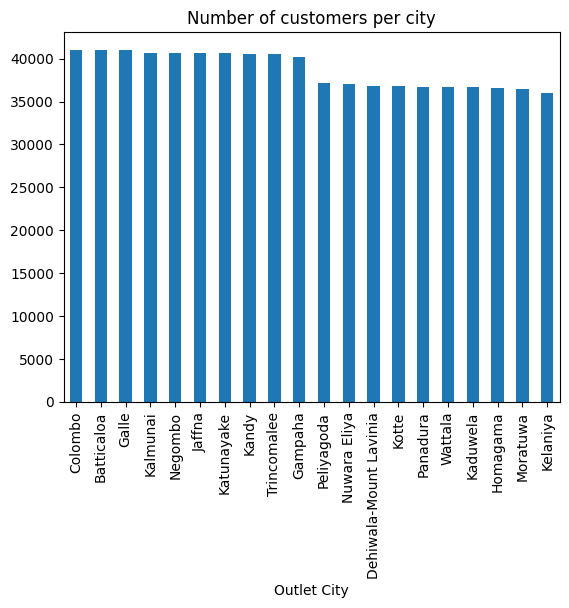

In [ ]:
# Create a bar graph
df['outlet_city'].value_counts().plot(kind='bar')
plt.title('Number of customers per city')
plt.xlabel('Outlet City')
plt.show()

The code plot a bar graph. This bar graph shows the number of customers for each city outlet. The highest number of customers are reported in the Colombo outlet. Lowest is reported in Kelaniya. All the outlets have above 35000 customers

In [ ]:
# Number of customers in each category
df.value_counts(subset = df.cluster_catgeory)

,count
cluster_catgeory,
1,188985
4,172439
6,169215
2,155064
3,48907
5,39540


The code counts the number of customers in each cluster_catgeory.

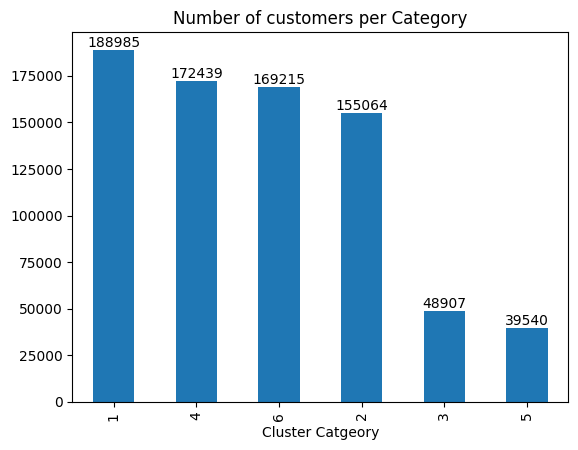

In [ ]:
# Create a bar graph
df['cluster_catgeory'].value_counts().plot(kind='bar')
plt.title('Number of customers per Category')
plt.xlabel('Cluster Catgeory')

# Add data labels
counts = df['cluster_catgeory'].value_counts()
for i, count in enumerate(counts):
  plt.text(i, count + 1, str(count), ha = 'center', va = 'bottom')
plt.show()

The code plot a bar graph. This bar graph shows the number of customers for each cluster category. The highest number of the customers are in the 1st category. Lowest number of customers are reported in the 5th category.

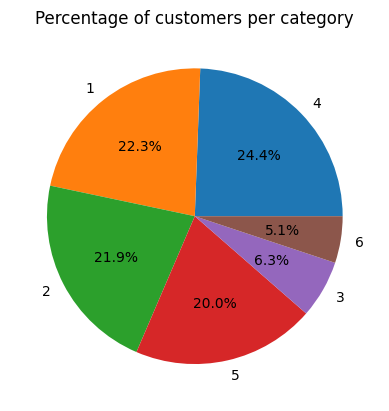

In [ ]:
# Create pie chart
y = df.value_counts(subset = df.cluster_catgeory)
mylabel = df.cluster_catgeory.unique()

plt.pie(y, labels = mylabel, autopct='%3.1f%%')
plt.title('Percentage of customers per category')
plt.show()

The code plot a pie chart.The pie chart shows the percentages of customers per cluster category. The highest percentage is reported in the 4th category which is 24.4%. The lowest percentage of customers are in the 6th category which is 5.1%.

#### Descriptive measures for numerical variables

In [ ]:
# Check the statistical analysis
df[['luxury_sales', 'fresh_sales', 'dry_sales']].describe()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
count,7.741480e+05,774150.000000,774150.000000,774150.000000,774150.000000
mean,1.038708e+07,1921.959149,4428.623964,4676.244392,3.292101
std,2.234797e+05,1004.058439,3334.579088,3409.311590,1.867015
min,1.000000e+07,500.000000,500.000000,500.000000,1.000000
25%,1.019354e+07,1213.552500,1620.220000,1788.000000,2.000000
50%,1.038708e+07,1715.280000,3356.510000,3727.760000,3.000000
75%,1.058062e+07,2338.680000,6671.280000,7161.760000,5.000000
max,1.077415e+07,6999.650000,13997.900000,13999.300000,6.000000


This code get summery statistics for luxury_sales, fresh_sales and dry_sales.

In [ ]:
Numerical_columns = ('luxury_sales', 'fresh_sales', 'dry_sales')

# Generate histograms
for col in Numerical_columns:
  col = px.histogram(df, x = col)
  col.show()

This code plot a histogram for luxury_sales, fresh_sales and dry_sales. By Looking at these histograms, All three histograms are right skewed. Also most values are concentrated on the left side of the histogram.

In [ ]:
Numerical_columns = ('luxury_sales', 'fresh_sales', 'dry_sales')

# Generate box plots
for col in Numerical_columns:
  col = px.box(df, x = col)
  col.show()

- This code plot a boxplot for luxury_sales, fresh_sales and dry_sales.

- luxury sales : Q1 is 1213.55 this means 25% of the luxury sales are below this value. The median 1715.28 which is the Q2 and Q3 value is 2,338.69. It is possible to have higher values in this so it is not considered as outliers.

- Fresh sales: Q1 is 1620.22 in the fresh sales and median (Q2) is 3356.51 and the Q3 value is 6671.28. There are no extreme values so there are no outliers.

- Dry sales : Q1 is 1788 in the dry sales. median (Q2) value is 3727.76 and the Q3 value is 7161.76. There are no outliers in the dry sales.

### Multivariate Analysis

#### Categorical - Categorical

In [ ]:
# Create a crosstab using the crosstab method
pd.crosstab(index= df['outlet_city'], columns= df['cluster_catgeory'])

cluster_catgeory,1,2,3,4,5,6
outlet_city,,,,,,
Batticaloa,18960,2,4901,0,2,17147
Colombo,19023,0,4959,3,2,17046
Dehiwala-Mount Lavinia,1,15648,0,17283,3902,4
Galle,19034,2,4932,1,3,17037
Gampaha,18763,1,4833,0,1,16654
Homagama,2,15464,0,17220,3951,1
Jaffna,18822,2,4906,3,2,16940
Kaduwela,1,15478,1,17360,3853,2
Kalmunai,18853,3,4831,1,1,17022


The code creates a crosstabulation table showing the frequency distribution of two categorical variables.

#### Categorical - Numerical

In [ ]:
# Create a pivot table
pd.pivot_table(df, values='luxury_sales', index='outlet_city', aggfunc=np.mean)

<ipython-input-41-e447125513e9>:2: FutureWarning:

The provided callable <function mean at 0x7dbe75d993a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



,luxury_sales
outlet_city,
Batticaloa,2127.883152
Colombo,2124.772409
Dehiwala-Mount Lavinia,1692.755487
Galle,2127.075014
Gampaha,2116.046320
Homagama,1698.885078
Jaffna,2124.764573
Kaduwela,1698.253797
Kalmunai,2114.897637


The code creates a crosstabulation table showing the frequency distribution of outlet_city and luxury_sales.

In [ ]:
# Create a pivot table
pd.pivot_table(df, values='fresh_sales', index='outlet_city', aggfunc=np.mean)

<ipython-input-42-ff1a281651d0>:2: FutureWarning:

The provided callable <function mean at 0x7dbe75d993a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



,fresh_sales
outlet_city,
Batticaloa,5026.099227
Colombo,5016.934510
Dehiwala-Mount Lavinia,3791.493913
Galle,5011.892306
Gampaha,4983.613918
Homagama,3783.255898
Jaffna,5019.588055
Kaduwela,3785.195923
Kalmunai,5009.388040


The code creates a crosstabulation table showing the frequency distribution of outlet_city and fresh_sales.

In [ ]:
# Create a pivot table
pd.pivot_table(df, values='dry_sales', index='outlet_city', aggfunc=np.mean)

<ipython-input-43-7fb66274deda>:2: FutureWarning:

The provided callable <function mean at 0x7dbe75d993a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



,dry_sales
outlet_city,
Batticaloa,5053.983633
Colombo,5041.190141
Dehiwala-Mount Lavinia,4245.510302
Galle,5068.087483
Gampaha,5062.512726
Homagama,4257.238822
Jaffna,5043.786248
Kaduwela,4279.756572
Kalmunai,5039.285445


The code creates a crosstabulation table showing the frequency distribution of outlet_city and dry_sales.

#### Numerical - Numerical

In [ ]:
#Generate scatter plots
import plotly.express as px

# Generating scatter plots with titles
fig1 = px.scatter(x=df['luxury_sales'], y=df['fresh_sales'])
fig1.update_layout(title="Luxury Sales vs Fresh Sales", xaxis_title="Luxury Sales", yaxis_title="Fresh Sales")
fig1.show()

fig2 = px.scatter(x=df['luxury_sales'], y=df['dry_sales'])
fig2.update_layout(title="Luxury Sales vs Dry Sales", xaxis_title="Luxury Sales", yaxis_title="Dry Sales")
fig2.show()

fig3 = px.scatter(x=df['fresh_sales'], y=df['dry_sales'])
fig3.update_layout(title="Fresh Sales vs Dry Sales", xaxis_title="Fresh Sales", yaxis_title="Dry Sales")
fig3.show()

The code create a scatter plot between luxury_sales, fresh_sales and dry_sales.

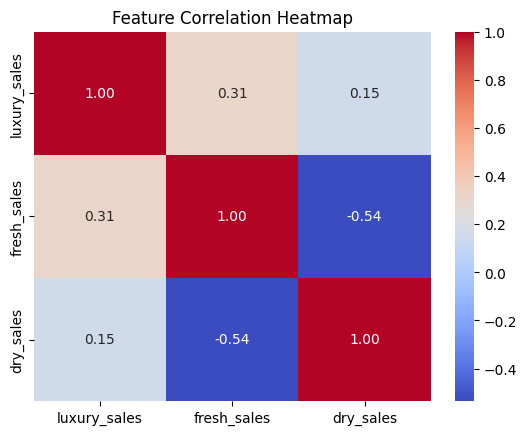

In [ ]:
Numerical_columns = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Correlation Heatmap
sns.heatmap(df[Numerical_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

The code creates a correlation heatmap for luxury_sales, fresh_sales and dry_sales. fresh_sales and dry_sales have slightly negative correlation.

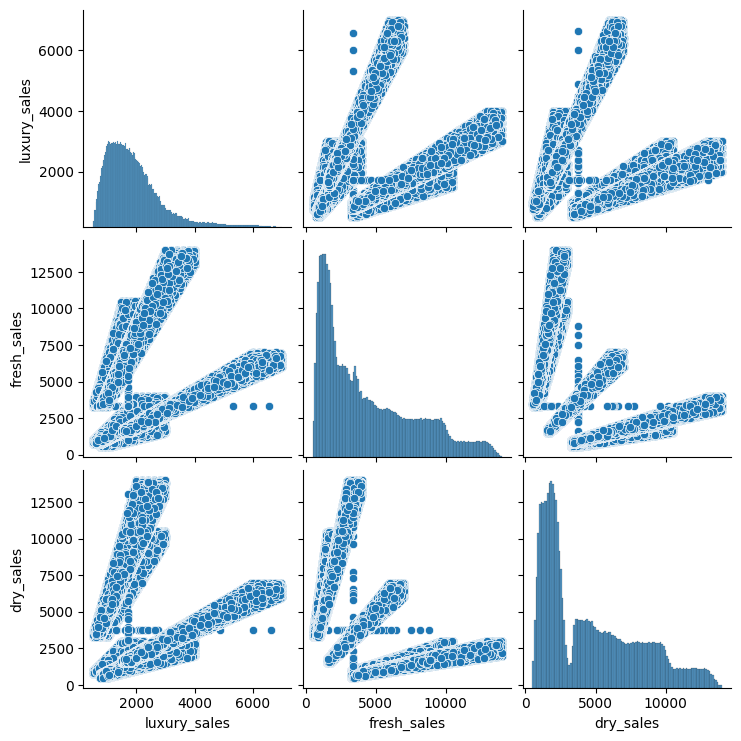

In [ ]:
Numerical_columns = ['luxury_sales', 'fresh_sales', 'dry_sales']

# Pairplot for feature relationships
sns.pairplot(df[Numerical_columns])
plt.show()

This code creates a pair plot (scatter matrix) to visualizes the relationships between Luxury Sales, Fresh Sales and Dry Sales by showing scatter plots for each pair of variables along with histograms of individual distributions.

For the plots,
-  Luxury vs. Fresh Sales: Displays clustered patterns with multiple linear trends.
- Luxury vs. Dry Sales: Similar clustered pattern with clear groupings
- Fresh vs. Dry Sales: Shows a distinct pattern with multiple linear clusters.
- The Histograms are right skewed.



### Customer Segmentation Analysis and Labeling

In [ ]:
# Group by 'cluster_category' and main sales columns
grouped_df = df.groupby('cluster_catgeory')[['luxury_sales', 'fresh_sales', 'dry_sales']].mean()
# Display the summary
print(grouped_df)

                  luxury_sales  fresh_sales    dry_sales
cluster_catgeory                                        
1                  1563.129381  2188.536814  8436.339507
2                  1249.650229  6745.451160  1749.709650
3                  4070.384286  4071.317814  4069.927554
4                  1748.636760  1250.060977  6742.590765
5                  3246.187056  3248.656666  3246.270241
6                  2185.049856  8425.463958  1562.301899


Using this code identified the trends that are in luxury_sales,fresh_sales and dry_sales for each categories.

In [ ]:
# Define segment names based on analysis
segment_mapping = {
    1: "Bulk Buyers",
    2: "Health-Conscious Buyers",
    3: "Luxury Seekers",
    4: "Budget-Conscious Shoppers",
    5: "Occasional Shoppers",
    6: "Everyday Shoppers"
}

# Create a new column with segment names
df["segment_name"] = df["cluster_catgeory"].map(segment_mapping)

# Save the updated dataset if needed
df.to_csv("segmented_customers.csv", index=False)

according to the identified trends named the cluster categories using mapping.  
- Bulk buyers ( cluster 1 )
Highesr dry sales (8,436) but moderate fresh & luxury sales indicate a preference for long-lasting and non-perishable goods. These customers likely buy in bulk, stocking up on essentials rather than making frequent smaller purchases.
- Health-Conscious Buyers (Cluster2)
Highest fresh sales (6,745) with significantly lower dry & luxury sales. This suggests that these customers focus on fresh food items, perishable like vegetables and fruits, prioritizing healthy eating habits over bulk or luxury spending.
- Luxury Seekers (Cluster 3)
High spending across all the categories approximately 4070 each suggests a balanced yet a luxury shopping behaviour, and in the EDA above it is shown that there are not many customers in cluster 3 which ensures these are luxury seeking customers. These customers are likely willing to spend more on the high-end products in all segments, making them ideal for luxury marketing.

- Budget-Conscious Shoppers (Cluster 4)
Releatively high dry sales (6,742) but low fresh (1,250) & luxury (1,748) sales indicate cost-saving behaviour. These customers prioritize non-perishable essentials over perishables.


- Occasional Shoppers (Clusters 5)
Moderate spending with each category with an approximate of 3246 but with the smallest customer base. This suggests that they shop occasionally and maintain a balanced but lower frequency of purchases, unlike everyday or bulk buyers.

- Everyday Shoppers (Cluster6)
Highest fresh sales (8,425) with moderate dry & luxury sales suggests frequent grocery shopping  habits. These customers prioritize fresh food, indicating they shop regularly rather than in bulk



In [ ]:
# Display the first few rows to verify
print(df.head())

   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0   10493832.0    Kelaniya       1209.60       756.00    5292.00   
1   10178643.0    Moratuwa       1590.12      1060.08    6007.12   
2   10513916.0     Wattala       2288.88      1481.04    9155.52   
3   10334589.0     Wattala       2274.94      1739.66    9099.76   
4   10458365.0    Kelaniya       2345.49      2069.55    9243.99   

   cluster_catgeory               segment_name  
0                 4  Budget-Conscious Shoppers  
1                 1                Bulk Buyers  
2                 4  Budget-Conscious Shoppers  
3                 4  Budget-Conscious Shoppers  
4                 4  Budget-Conscious Shoppers  


<ipython-input-56-ddeb8f11dda1>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




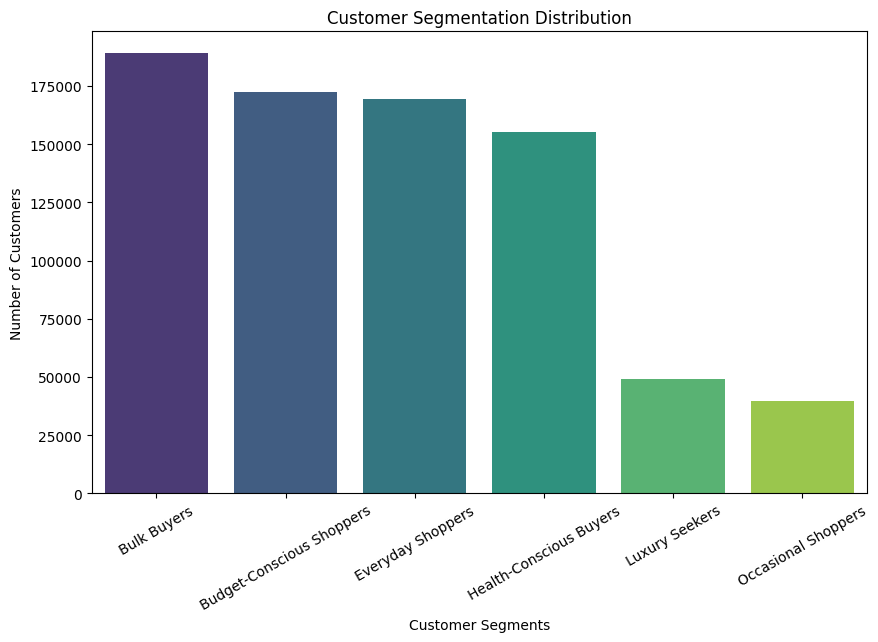

In [ ]:
# Count the number of customers in each segment
segment_counts = df["segment_name"].value_counts()

# Plot the segmentation distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")

# Labels and title
plt.xlabel("Customer Segments")
plt.ylabel("Number of Customers")
plt.title("Customer Segmentation Distribution")
plt.xticks(rotation=30)  # Rotate labels for better readability

# Display the plot
plt.show()